# DA Final Project:

## Group: India Agriculture Crop Production

### Names of students:
Ateret Bass <br>
Koliya Aharon

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/koliyaaharon/EDA-project/main/data/India%20Agriculture%20Crop%20Production.csv")
f = df.copy()
f

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [22]:
df.shape

(345407, 10)

In [23]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [24]:
df.dtypes

State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object

In [25]:
df.isnull().sum().sort_values()

State                  0
District               0
Year                   0
Area Units             0
Production Units       0
Season                 1
Crop                  32
Area                  33
Yield                 33
Production          4993
dtype: int64

In [26]:
#האם יש קשר בין המחוז הגדול ביותר ליבול הנפוץ ביותר?

C:\Users\Koliya\AppData\Local\Temp\ipykernel_28708\697016796.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.figure.show()


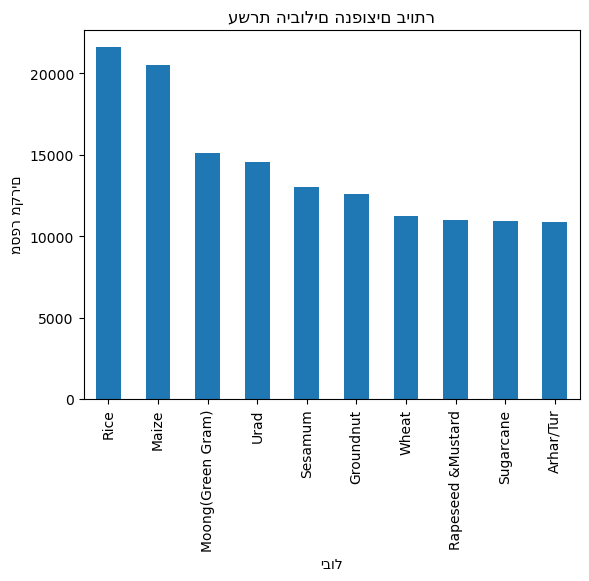

In [27]:
# מצא את עשרת היבולים הנפוצים ביותר
crop_counts = df['Crop'].value_counts().head(10)

# יצירת גרף
plot = crop_counts.plot(kind='bar', title='עשרת היבולים הנפוצים ביותר', ylabel='מספר מקרים', xlabel='יבול')
plot.figure.show()

In [28]:
pivot_table = df.pivot_table(index='Crop', columns='Season', values='Area', aggfunc='sum')

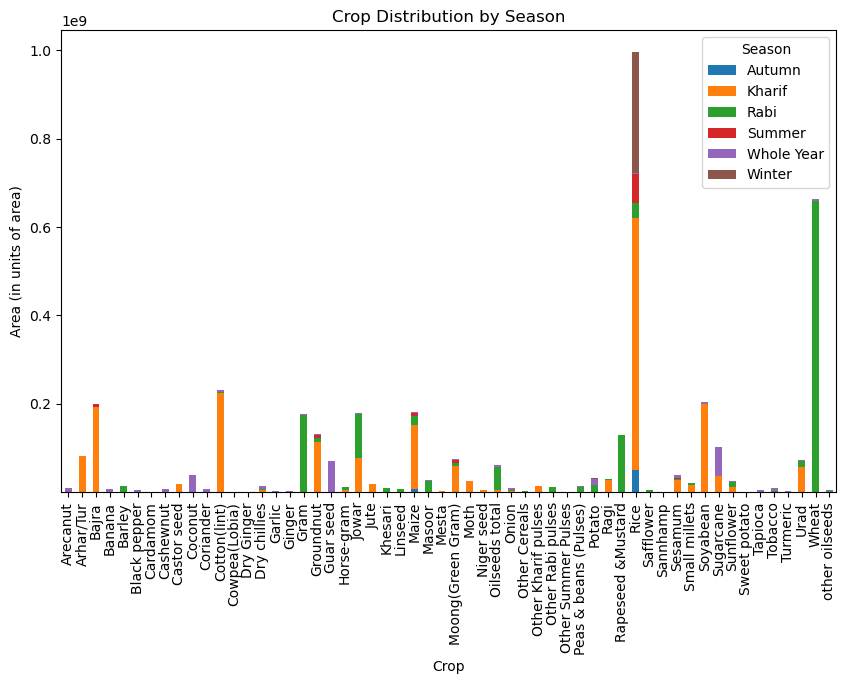

In [29]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crop Distribution by Season')
plt.xlabel('Crop')
plt.ylabel('Area (in units of area)')
plt.legend(title='Season')
plt.show()

In [30]:
sns.histplot(crop_data_scatter['Yield'], bins=20, kde=True, color='blue', label='Yield')

# גרף סטיית תדרים עבור התפוקות
sns.histplot(crop_data_scatter['Production'], bins=20, kde=True, color='green', label='Production')

# הגדרות נוספות לגרף
plt.title('Distribution of Yield and Production')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# הצגת הגרף
plt.show()

NameError: name 'crop_data_scatter' is not defined

In [ ]:
# יצירת מסגרת חדשה
plt.figure(figsize=(14, 8))

# יצירת גרף סטיית תדרים (heatmap) לפי שנה ומחוז
heatmap_data = crop_data_scatter.pivot_table(index='Year', columns='District', values='Yield', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu')

# הגדרות נוספות לגרף
plt.title('Yield by Year and District')
plt.xlabel('District')
plt.ylabel('Year')

# הצגת הגרף
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

# יצירת גרף קווים לכל מחוז
for district in crop_data_scatter['District'].unique():
    district_data = crop_data_scatter[crop_data_scatter['District'] == district]
    plt.plot(district_data['Year'], district_data['Yield'], label=district)

# הגדרות נוספות לגרף
plt.title('Yield by Year and District')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# הצגת הגרף
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))

# יצירת גרף סטיית תדרים (heatmap) לפי שנה ומחוז עם צבעים שונים
sns.heatmap(data=crop_data_scatter.pivot_table(index='Year', columns='District', values='Yield', aggfunc='mean'), cmap='viridis')

# הגדרות נוספות לגרף
plt.title('Yield by Year and District')
plt.xlabel('District')
plt.ylabel('Year')

# הצגת הגרף
plt.show()

In [ ]:
# קיבוץ הנתונים לפי שנה ויבול
yearly_crop_data = df.groupby(['Year', 'Crop'])['Production'].sum().unstack('Crop')

In [ ]:
yearly_crop_data.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production (Tonnes)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# זיהוי היבול עם הייצור המקסימלי והמינימלי בכל שנה
max_crop_per_year = yearly_crop_data.idxmax(axis=1)
min_crop_per_year = yearly_crop_data.idxmin(axis=1)

# ספירת מספר השנים שכל יבול היה המקסימלי והמינימלי
max_crop_counts = max_crop_per_year.value_counts()
min_crop_counts = min_crop_per_year.value_counts()

In [ ]:
# שרטוט הגרפים
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

max_crop_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Crop with Maximum Production (Count per Year)')
ax[0].set_xlabel('Crop')
ax[0].set_ylabel('Number of Years')

min_crop_counts.plot(kind='bar', ax=ax[1])
ax[1].set_title('Crop with Minimum Production (Count per Year)')
ax[1].set_xlabel('Crop')
ax[1].set_ylabel('Number of Years')

plt.tight_layout()
plt.show()

In [ ]:


# מחיקת שורות עם ערכי חסר בשדה 'Area'
df.dropna(subset=['Area'], inplace=True)

# מציאת המחוז עם השטח הגדול ביותר
largest_area_district = df.groupby('District')['Area'].max().idxmax()
largest_area_value = df.groupby('District')['Area'].max().max()

# סינון הנתונים עבור המחוז עם השטח הגדול ביותר
largest_area_data = df[df['District'] == largest_area_district]

# קיבוץ הנתונים לפי יבול לקבלת ערכי הייצור עבור מחוז זה
crop_production_largest_area = largest_area_data.groupby('Crop')['Production'].sum().reset_index()

# שרטוט הגרף
plt.figure(figsize=(14, 7))
sns.barplot(data=crop_production_largest_area, x='Crop', y='Production')
plt.title(f'Crop Production in the Largest District ({largest_area_district})')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:

# מחיקת שורות עם ערכי חסר בשדה 'Area' ובשדה 'Production'
df.dropna(subset=['Area', 'Production'], inplace=True)

# מציאת המחוז עם השטח הגדול ביותר
largest_area_district = df.groupby('District')['Area'].max().idxmax()

# סינון הנתונים עבור המחוז עם השטח הגדול ביותר
largest_area_data = df[df['District'] == largest_area_district]

# קיבוץ הנתונים לפי יבול לקבלת ערכי הייצור עבור מחוז זה
crop_production_largest_area = largest_area_data.groupby('Crop')['Production'].sum().reset_index()

# שרטוט גרף עבור המחוז עם השטח הגדול ביותר
plt.figure(figsize=(14, 7))
sns.barplot(data=crop_production_largest_area, x='Crop', y='Production')
plt.title(f'Crop Production in the Largest District ({largest_area_district})')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# מציאת היבול עם הייצור הגבוה ביותר
top_crop = df.groupby('Crop')['Production'].sum().idxmax()

# קיבוץ הנתונים לפי מחוז לניתוח השטח והיבול
district_area_crop_production = df[df['Crop'] == top_crop].groupby('District')[['Area', 'Production']].sum().reset_index()

# שרטוט גרף השוואה בין שטח המחוז לייצור היבול הנפוץ ביותר
plt.figure(figsize=(14, 7))
sns.scatterplot(data=district_area_crop_production, x='Area', y='Production', hue='District', s=100, palette='viridis')
plt.title(f'Relationship Between District Area and Production of Top Crop ({top_crop})')
plt.xlabel('Area (Hectares)')
plt.ylabel('Total Production (Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# מחיקת שורות עם ערכי חסר בשדה 'Area' ובשדה 'Production'
df.dropna(subset=['Area', 'Production'], inplace=True)

# מציאת המחוז עם השטח הגדול ביותר
largest_area_district = df.groupby('District')['Area'].sum().idxmax()

# סינון הנתונים עבור המחוז עם השטח הגדול ביותר
largest_area_data = df[df['District'] == largest_area_district]

# קיבוץ הנתונים לפי יבול לקבלת ערכי הייצור עבור מחוז זה
crop_production_largest_area = largest_area_data.groupby('Crop')['Production'].sum().reset_index()

# בחירת 10 הגידולים הנפוצים ביותר
top_10_crops = crop_production_largest_area.nlargest(10, 'Production')

# שרטוט גרף עבור המחוז עם השטח הגדול ביותר
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_crops, x='Crop', y='Production', palette='viridis')
plt.title(f'Crop Production in the Largest District ({largest_area_district})')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# מציאת היבול עם הייצור הגבוה ביותר
top_crop = df.groupby('Crop')['Production'].sum().idxmax()

# קיבוץ הנתונים לפי מחוז לניתוח השטח והיבול
district_area_crop_production = df[df['Crop'] == top_crop].groupby('District')[['Area', 'Production']].sum().reset_index()

# שרטוט גרף השוואה בין שטח המחוז לייצור היבול הנפוץ ביותר
plt.figure(figsize=(14, 7))
sns.scatterplot(data=district_area_crop_production, x='Area', y='Production', hue='District', s=100, palette='viridis')
plt.title(f'Relationship Between District Area and Production of Top Crop ({top_crop})')
plt.xlabel('Area (Hectares)')
plt.ylabel('Total Production (Tonnes)')
plt.grid(True)

In [ ]:
# מחיקת שורות עם ערכי חסר בשדה 'Area' ובשדה 'Production'
df.dropna(subset=['Area', 'Production'], inplace=True)

# מציאת המחוז עם השטח הגדול ביותר
largest_area_district = df.groupby('District')['Area'].sum().idxmax()

# סינון הנתונים עבור המחוז עם השטח הגדול ביותר
largest_area_data = df[df['District'] == largest_area_district]

# קיבוץ הנתונים לפי יבול לקבלת ערכי הייצור עבור מחוז זה
crop_production_largest_area = largest_area_data.groupby('Crop')['Production'].sum().reset_index()

# בחירת 10 הגידולים הנפוצים ביותר
top_10_crops = crop_production_largest_area.nlargest(10, 'Production')

# שרטוט גרף עבור המחוז עם השטח הגדול ביותר
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_crops, x='Crop', y='Production', palette='viridis')
plt.title(f'Crop Production in the Largest District ({largest_area_district})')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# סינון הנתונים עבור עשרת הגידולים הנפוצים ביותר
top_10_crop_names = top_10_crops['Crop'].tolist()
top_10_crop_data = df[df['Crop'].isin(top_10_crop_names)]

# קיבוץ הנתונים לפי יבול ומחוז
district_area_crop_production_top_10 = top_10_crop_data.groupby(['District', 'Crop'])[['Area', 'Production']].sum().reset_index()

# שרטוט גרף עמודות להשוואה בין שטח המחוז לייצור עבור עשרת היבולים הנפוצים ביותר
plt.figure(figsize=(14, 7))
sns.barplot(data=district_area_crop_production_top_10, x='Crop', y='Production', hue='District', palette='viridis')
plt.title('Production of Top 10 Crops by District')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
 דוגמה לגרף פיזור של שטח מול ייצור
fig = px.scatter(data, x='Area', y='Production', color='Crop',
                 title='Production vs Area by Crop',
                 labels={'Area': 'Area (Hectares)', 'Production': 'Production (Tonnes)'},
                 hover_data=['State', 'District', 'Year'])

fig.show()